## Approximation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Throughout this session, the main example function we will use is the following, which is comprised of a trigonometric term and a linear term:

In [2]:
def f(x):
    return np.sin(x) + 0.5 * x

The main focus is the approximation of this function over a given interval by _regression_ and _interpolation_. Let us generate a plot of the function to get a better view of what exactly the approximation shall achieve. The interval of interest shall be [–2,2].

In [3]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 50)

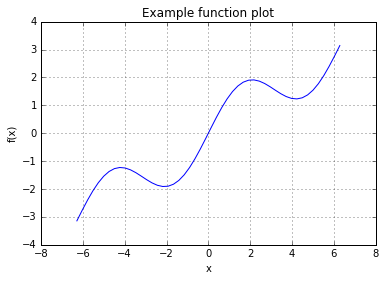

In [4]:
plt.plot(x, f(x), 'b')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Example function plot')

_Approximation_ >
### Regression

Regression is a rather efficient tool when it comes to function approximation. Basically, the task of regression, given a set of so-called basis functions b<sub>d</sub>, d ∈ {1,...,D}, is to find optimal parameters &alpha;<sup>*</sup><sub>1</sub>, ...,&alpha;<sup>*</sup><sub>D</sub> according to Equation 1, where y<sub>i</sub> ≡ f(x<sub>i</sub>) for i ∈ {1,⋯, I} observation points. The x<sub>i</sub> are considered independent observations and the y<sub>i</sub> dependent observations (in a functional or statistical sense).

**Equation 1**. _Minimization problem of regression_

$$ \min_{\alpha_{1},...,\alpha_{D}}\frac{1}{I} \sum^{I}_{i=1}{(y_{i} - \sum^{D}_{d=1} {\alpha_{d} \cdot b_{d}(x_{i}) })^{2}}$$

_Approximation_ > _Regression_ >
#### Monomials as basis functions

One of the simplest cases is to take monomials as basis functions — i.e., b<sub>1</sub> = 1, b<sub>2</sub> = x, b<sub>3</sub>= x<sup>2</sup>, b<sub>4</sub> = x<sup>3</sup>,.... <code>NumPy</code> has built-in functions for both the determination of
the optimal parameters (namely, <code>polyfit</code>) and the evaluation of the approximation given a set of input values (namely, <code>polyval</code>).

<center>_Parameters of <code>polyfit</code> function_</center>

| Parameter   | Description        |
|:-----------:|-------------------|
| x | x coordinates (independent variable values) | 
| y | y coordinates (dependent variable values) |
| deg | Degree of the fitting polynomial |
| full | If True, returns diagnostic information in addition |
| w | Weights to apply to the y coordinates |
| cov | If True, covariance matrix is also returned |

The application of <code>polyfit</code> and <code>polyval</code> takes on the following form for a linear regression (i.e., for deg=1):

In [5]:
reg = np.polyfit(x, f(x), deg=1)
ry = np.polyval(reg, x)

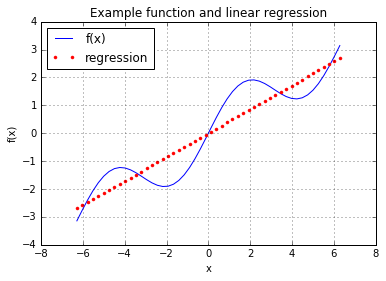

In [6]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Example function and linear regression')

To account for the <code>sin</code> part of the example function, higher-order monomials are necessary. The next regression attempt takes monomials up to the order of 5 as basis functions.

In [7]:
reg = np.polyfit(x, f(x), deg=5)
ry = np.polyval(reg, x)

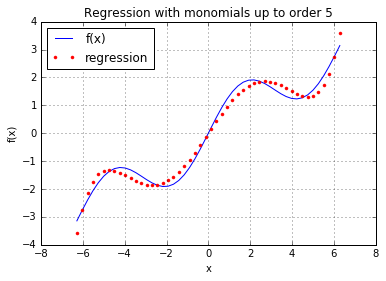

In [8]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Regression with monomials up to order 5')

Take monomials up to order 7 to approximate the example function.

In [9]:
reg = np.polyfit(x, f(x), deg=7)
ry = np.polyval(reg, x)

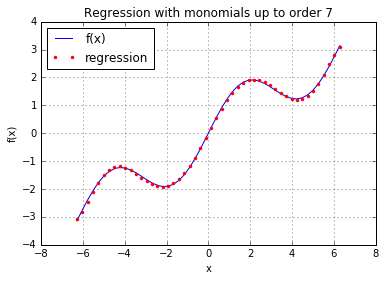

In [10]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Regression with monomials up to order 7')

In [11]:
np.allclose(f(x), ry)

False

The mean squared error (MSE) is not too large — at least, over this narrow range of x values:

In [12]:
np.sum((f(x) - ry) ** 2) / len(x)

0.0017769134759517704

_Approximation_ > _Regression_ >
#### Individual basis functions

In general, you can reach better regression results when you can choose better sets of basis functions, e.g., by exploiting knowledge about the function to approximate. 

The individual basis functions have to be defined via a matrix approach. First, the case with monomials up to order 3:

In [13]:
matrix = np.zeros((3 + 1, len(x)))
matrix[3, :] = x ** 3
matrix[2, :] = x ** 2
matrix[1, :] = x
matrix[0, :] = 1

The sublibrary <code>numpy.linalg</code> provides the function <code>lstsq</code> to solve least-squares optimization problems like the one in Equation 1:

In [14]:
reg = np.linalg.lstsq(matrix.T, f(x))[0]

In [15]:
reg

array([  1.52685368e-14,   5.62777448e-01,  -1.11022302e-15,
        -5.43553615e-03])

To get the regression estimates we apply the <code>dot</code> function to the <code>reg</code> and <code>matrix</code> arrays.

In [16]:
ry = np.dot(reg, matrix)

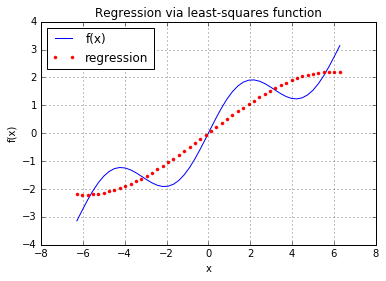

In [17]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Regression via least-squares function')

Using the more general approach allows us to exploit our knowledge about the example function. We know that there is a sin part in the function.

In [18]:
matrix[3, :] = np.sin(x)
reg = np.linalg.lstsq(matrix.T, f(x))[0]
ry = np.dot(reg, matrix)

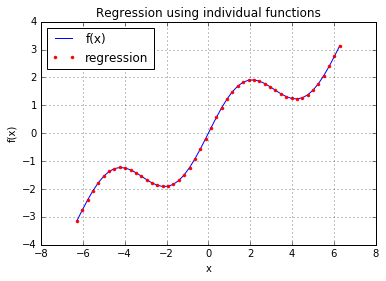

In [19]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Regression using individual functions')

In [20]:
np.allclose(f(x), ry)

True

In [21]:
np.sum((f(x) - ry) ** 2) / len(x)

1.8541312760604798e-31

In [22]:
reg

array([  9.26243218e-17,   5.00000000e-01,   0.00000000e+00,
         1.00000000e+00])

_Approximation_ > _Regression_ >
#### Noisy data

Regression can cope equally well with _noisy_ data, be it data from simulation or from measurements. 

Let us generate both independent observations with noise and also dependent observations with noise:

In [23]:
xn = np.linspace(-2 * np.pi, 2 * np.pi, 50)
xn = xn + 0.15 * np.random.standard_normal(len(xn))
yn = f(xn) + 0.25 * np.random.standard_normal(len(xn))

In [24]:
reg = np.polyfit(xn, yn, 7)
ry = np.polyval(reg, xn)

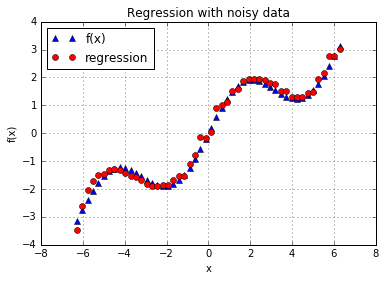

In [25]:
plt.plot(x, f(x), 'b^', label='f(x)')
plt.plot(x, ry, 'ro', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Regression with noisy data')

_Approximation_ > _Regression_ >
#### Unsorted data

Another important aspect of regression is that the approach also works seamlessly with unsorted data.

Let us randomize the independent data points as follows:

In [26]:
xu = np.random.rand(50) * 4 * np.pi - 2 * np.pi
yu = f(xu)

We can hardly identify any structure by just visually inspecting the raw data:

In [27]:
print(xu[:10].round(2))
print(yu[:10].round(2))

[-0.49  3.33  0.69  5.75 -2.03 -3.94 -2.35  2.83 -5.6  -3.04]
[-0.72  1.48  0.98  2.36 -1.91 -1.25 -1.89  1.72 -2.17 -1.62]


As with the noisy data, the regression approach does not care for the order of the observation points.

In [28]:
reg = np.polyfit(xu, yu, 5)
ry = np.polyval(reg, xu)

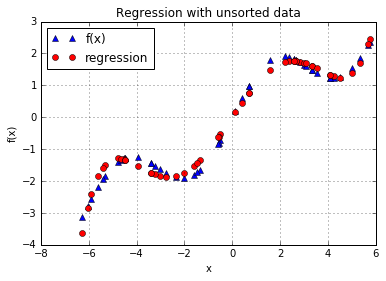

In [29]:
plt.plot(xu, yu, 'b^', label='f(x)')
plt.plot(xu, ry, 'ro', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Regression with unsorted data')

_Approximation_ > _Regression_ >
#### Multiple dimensions

Another convenient characteristic of the least-squares regression approach is that it carries over to multiple dimensions without too many modifications.

In [30]:
def fm(x, y):
    return np.sin(x) + 0.25 * x + np.sqrt(y) + 0.05 * y ** 2

To visualize this function, we need a grid of (independent) data points:

In [31]:
x = np.linspace(0, 10, 20)
y = np.linspace(0, 10, 20)
X, Y = np.meshgrid(x, y)
    # generates 2-d grids out of the 1-d arrays
Z = fm(X, Y)
x = X.flatten()
y = Y.flatten()
    # yields 1-d arrays from the 2-d grids

Based on the grid of independent and dependent data points as embodied now by X, Y, Z, the Figure presents the shape of the function <code>fm</code>:

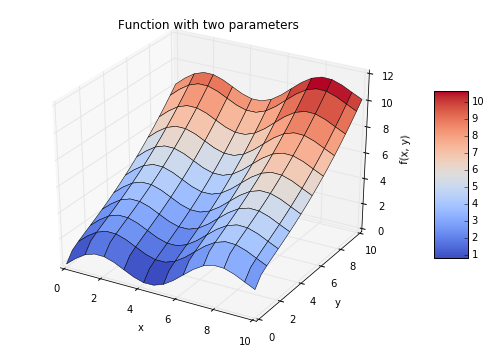

In [32]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib as mpl

fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2,
                       cmap=mpl.cm.coolwarm,
                       linewidth=0.5, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Function with two parameters')

To get good regression results we compile a set of basis functions, including both a <code>sin</code> and a <code>sqrt</code> function. 

In [33]:
matrix = np.zeros((len(x), 6 + 1))
matrix[:, 6] = np.sqrt(y)
matrix[:, 5] = np.sin(x)
matrix[:, 4] = y ** 2
matrix[:, 3] = x ** 2
matrix[:, 2] = y
matrix[:, 1] = x
matrix[:, 0] = 1

The <code>statsmodels</code> library offers the quite general and helpful function <code>OLS</code> for least-squares regression both in one dimension and multiple dimensions:

In [34]:
import statsmodels.api as sm

In [35]:
model = sm.OLS(fm(x, y), matrix).fit()

One advantage of using the <code>OLS</code> function is that it provides a wealth of additional information about the regression and its quality. A summary of the results is accessed by calling <code>model.summary</code>.

In [36]:
model.rsquared

1.0

We of course need the optimal regression parameters, which are stored in the <code>params</code> attribute of our <code>model</code> object:

In [37]:
a = model.params
a

array([ -4.16333634e-15,   2.50000000e-01,  -4.24660307e-15,
        -3.40005801e-16,   5.00000000e-02,   1.00000000e+00,
         1.00000000e+00])

The function <code>reg_func</code> gives back, for the given optimal regression parameters and the indpendent data points, the function values for the regression function:

In [38]:
def reg_func(a, x, y): 
    f6 = a[6] * np.sqrt(y)
    f5 = a[5] * np.sin(x)
    f4 = a[4] * y ** 2
    f3 = a[3] * x ** 2
    f2 = a[2] * y
    f1 = a[1] * x
    f0 = a[0] * 1
    return (f6 + f5 + f4 + f3 + f2 + f1 + f0)

These values can then be compared with the original shape of the example function.

In [39]:
RZ = reg_func(a, X, Y)

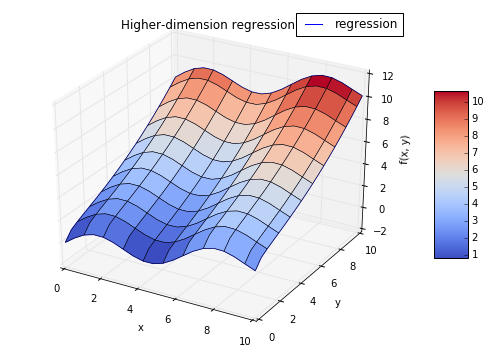

In [40]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')
surf1 = ax.plot_surface(X, Y, Z, rstride=2, cstride=2,
                        cmap=mpl.cm.coolwarm, linewidth=0.5,
                        antialiased=True)
surf2 = ax.plot_wireframe(X, Y, RZ, rstride=2, cstride=2,
                          label='regression')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.legend()
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Higher-dimension regression')

> <center>**REGRESSION**</center>

> Least-squares regression approaches have multiple areas of application, including simple function approximation and function approximation based on noisy or unsorted data. These approaches can be applied to single as well as multidimensional problems. Due to the underlying mathematics, the application is always “almost the same.”

_Approximation_ >
### Interpolation

Compared to regression, <code>interpolation</code> (e.g., with cubic splines), is much more involved mathematically. It is also limited to low-dimensional problems.

Given an ordered set of observation points (ordered in the x dimension), the basic idea is to do a regression between two neighboring data points.

not only are the data points perfectly matched by the resulting, piecewise-defined interpolation function, but also that the function is continuously differentiable at the data points. Continuous differentiability requires at least interpolation of degree 3 — i.e., with <code>cubic</code> splines. However, the approach also works in general with quadratic and even linear splines.

In [41]:
import scipy.interpolate as spi

In [42]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 25)

In [43]:
def f(x):
    return np.sin(x) + 0.5 * x

The application itself, given an x-ordered set of data points, is as simple as the application of <code>polyfit</code> and <code>polyval</code>. Here, the respective functions are <code>splrep</code> and <code>splev</code>.

<center>_Parameters of <code>splrep</code> function_</center>

| Parameter   | Description        |
|:-----------:|-------------------|
| x | (Ordered) x coordinates (independent variable values) | 
| y | (x-ordered) y coordinates (dependent variable values) |
| w | Weights to apply to the y coordinates |
| xb, xe | Interval to fit, if None [x[0], x[-1]] |
| k | Order of the spline fit ( 1 <= k <= 5) |
| s | Smoothing factor (the larger, the more smoothing) |
| full_output | If True additional output is returned |
| quiet | If True suppress messages |

<center>_Parameters of <code>splev</code> function_</center>

| Parameter   | Description        |
|:-----------:|-------------------|
| x | (Ordered) x coordinates (independent variable values) | 
| tck | Sequence of length 3 returned by splrep (knots, coefficients, degree) |
| der | Order of derivative (0 for function, 1 for first derivative) |
| ext | Behavior if x not in knot sequence (0 extrapolate, 1 return 0, 2 raise ValueError) |

In [44]:
ipo = spi.splrep(x, f(x), k=1)

In [45]:
iy = spi.splev(x, ipo)

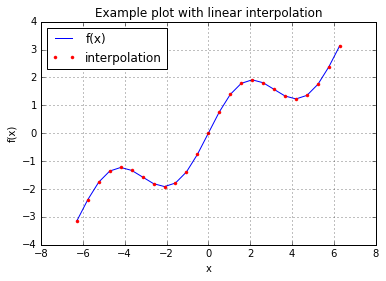

In [46]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, iy, 'r.', label='interpolation')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Example plot with linear interpolation')

In [47]:
np.allclose(f(x), iy)

True

Spline interpolation is often used in finance to generate estimates for dependent values of independent data points not included in the original observations. To this end, let us pick a much smaller interval and have a closer look at the interpolated values with the linear splines:

In [48]:
xd = np.linspace(1.0, 3.0, 50)
iyd = spi.splev(xd, ipo)

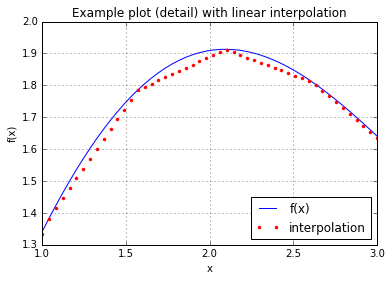

In [49]:
plt.plot(xd, f(xd), 'b', label='f(x)')
plt.plot(xd, iyd, 'r.', label='interpolation')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Example plot (detail) with linear interpolation')

let us repeat the complete exercise, this time using cubic splines:

In [50]:
ipo = spi.splrep(x, f(x), k=3)
iyd = spi.splev(xd, ipo)

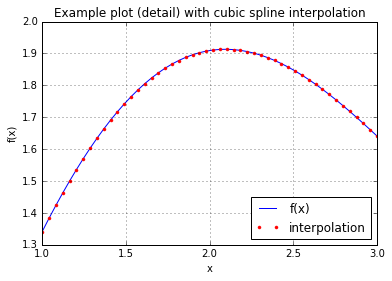

In [51]:
plt.plot(xd, f(xd), 'b', label='f(x)')
plt.plot(xd, iyd, 'r.', label='interpolation')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Example plot (detail) with cubic spline interpolation')

The interpolation is not perfect, but the MSE is really small:

In [52]:
np.allclose(f(xd), iyd)

False

In [53]:
np.sum((f(xd) - iyd) ** 2) / len(xd)

1.1349319851436892e-08